# **Week 5**

## **In Class**

### Exercise 1

#### *Test* (Zet de sample size niet te hoog)

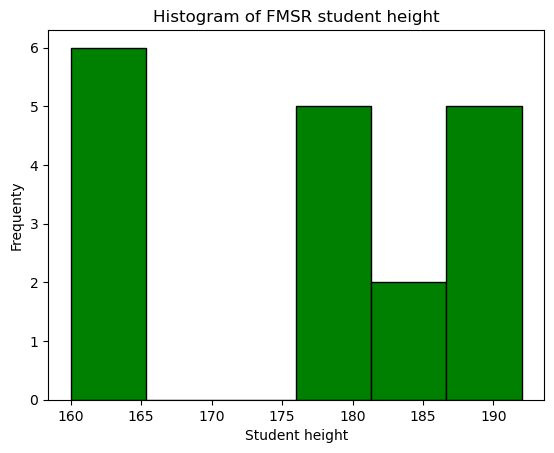

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  4 15:29:42 2024

@author: rbaia
"""

import itertools
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset and assign it a name (e.g., 'data')
# This script is made in Spyder, so in the Files pane the local folder where I stored the Excel file with survey results is open
# If you use another IDE, please adapt the script to read the data
data = pd.read_excel("minor_survey.xlsx")

# Drop missing values
data = data.dropna()

# Plot histogram of FMSR student length
plt.hist(data["length"], bins=6, color='green', edgecolor='black')
plt.title('Histogram of FMSR student height')
plt.xlabel('Student height')
plt.ylabel('Frequenty')
plt.show()

Number of samples possible: 5832
Check if number of samples is correct: 5832
Number of samples selected: 1000


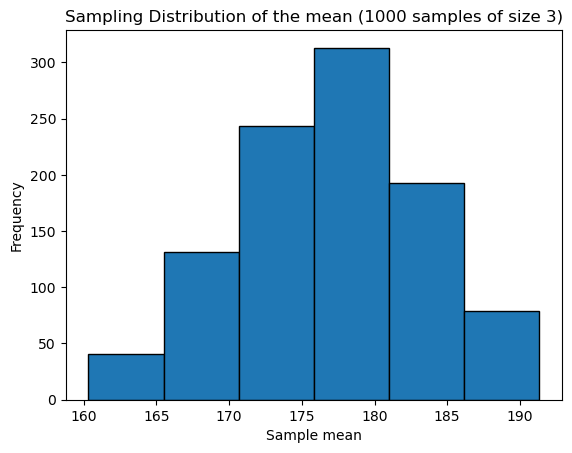

Mean of sample means: 176.82
Mean of data: 176.89
Mean of sample means: 176.89


In [7]:
# Determine sample size and the number of samples to generate
sample_size = 3
num_samples = 1000

# Generate all unique combinations of 3 observations
all_samples_with_replacement  = list(itertools.product(data["length"], repeat=sample_size))
print('Number of samples possible:', len(all_samples_with_replacement))
print('Check if number of samples is correct:', len(data)**sample_size)

# Randomly select 'num_samples' samples from 'all_samples_with_replacement'
samples_with_replacement = random.sample(all_samples_with_replacement, num_samples)
print('Number of samples selected:', len(samples_with_replacement))

# Compute the mean of every sample in the set 'samples_with_replacement'
sample_means = [np.mean(sample) for sample in samples_with_replacement]

# Compute the mean of every sample in the set 'all_samples_with_replacement'
all_sample_means = [np.mean(sample) for sample in all_samples_with_replacement]

# Plot histogram of the sampling distribution of the mean
plt.hist(sample_means, bins=6, edgecolor='black')
plt.title(f'Sampling Distribution of the mean ({num_samples} samples of size {sample_size})')
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.show()

# Compute the mean of the randomly selected samples
mean_of_sample_means = np.mean(sample_means)
print('Mean of sample means:', round(mean_of_sample_means, 2))

# Compute the mean length of FMSR students
data_mean = np.mean(data["length"])
print('Mean of data:', round(data_mean, 2))

# Compute the mean of all possible samples, see that it is equal to the mean length of FMSR students
mean_of_all_sample_means = np.mean(all_sample_means)
print('Mean of sample means:', round(mean_of_all_sample_means, 2))

### Exercise 2

#### Test

In [8]:
import scipy.stats as stats

# Calculate the mean and standard error of the mean (SEM)
mean_length = np.mean(data["length"])
sem_length = stats.sem(data["length"])

# Calculate the 95% confidence interval
confidence_interval = stats.t.interval(0.95, len(data["length"]) - 1, loc=mean_length, scale=sem_length)

# Calculate the margin of error
margin_of_error = (confidence_interval[1] - confidence_interval[0]) / 2

print(f"Mean length: {mean_length:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")
print(f"Margin of Error: {margin_of_error:.2f}")

Mean length: 176.89
95% Confidence Interval: (171.072306424151, 182.70547135362676)
Margin of Error: 5.82


### Test code

In [9]:
import numpy as np
from scipy.stats import ttest_1samp
# Specify the provided data
data = np.array([15.5, 15.6, 15.4, 15.7, 15.0, 14.8, 15.3, 14.85, 15.4,
15.1])
# Specify the assumed mean given that the null-hypothesis is true
assumed_mean = 15
# Conduct the test and print the results
result = ttest_1samp(data, assumed_mean, alternative = 'greater')
print(result)

TtestResult(statistic=2.6795638604536745, pvalue=0.01261204208070953, df=9)


### Exercise 3

In [39]:
from scipy.stats import ttest_1samp

minor_survey = pd.read_excel("minor_survey.xlsx")
minor_survey_clean = minor_survey["expected_grade"].dropna()

# Perform a one-sample t-test
population_mean = 7.5

# Conduct the test and print the results
result = ttest_1samp(minor_survey_clean, population_mean, alternative = 'two-sided')
print(result)

TtestResult(statistic=-0.31130525702707734, pvalue=0.7587901780247438, df=20)


In [14]:
from scipy.stats import ttest_ind

# Sample data: Replace `men_heights` and `women_heights` with actual data
men_heights = [/* Add heights of male Olympians here */]
women_heights = [/* Add heights of female Olympians here */]

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(men_heights, women_heights)

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("Olympian men are significantly taller than Olympian women.")
else:
    print("There is no significant difference in height between Olympian men and women.")

SyntaxError: invalid syntax (3998322932.py, line 4)

In [15]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Sample data: Replace with actual heights grouped by country
data = {
    'country': ['BEL', 'BEL', 'BRA', 'BRA', 'NOR', 'NOR', 'CHN', 'CHN'],  # Example countries
    'height': [/* Add heights here */]
}
df = pd.DataFrame(data)

# Perform one-way ANOVA
bel_heights = df[df['country'] == 'BEL']['height']
bra_heights = df[df['country'] == 'BRA']['height']
nor_heights = df[df['country'] == 'NOR']['height']
chn_heights = df[df['country'] == 'CHN']['height']

f_stat, p_value = f_oneway(bel_heights, bra_heights, nor_heights, chn_heights)

# Print the results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference in athlete heights among the countries.")
    
    # Perform Tukey's HSD post-hoc test
    tukey = pairwise_tukeyhsd(df['height'], df['country'], alpha=0.05)
    print(tukey)
else:
    print("There is no significant difference in athlete heights among the countries.")

SyntaxError: invalid syntax (2503592292.py, line 8)

## **Homework**